In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
## Clean and Export Datasets

In [3]:
brands = pd.read_json('/Users/yuxuanhuang/Desktop/brands.json', lines=True)

brands['_id'] = brands['_id'].apply(lambda x: list(x.values())[0])
brands = brands.rename(columns={'_id':'brandId'})
# brands = brands.rename(columns={'barcode':'productId'})
brands['barcode'] = brands['barcode'].astype(str)

cpg = brands[['brandId','cpg']].copy()
cpg['oid'] = cpg['cpg'].apply(lambda x: list(x.values())[0] 
                              if len(list(x.values())[0]) != 4 
                              else list(x.values())[1])
cpg['oid'] = cpg['oid'].apply(lambda x: list(x.values())[0])
cpg['ref'] = cpg['cpg'].apply(lambda x: list(x.values())[1] 
                              if len(list(x.values())[1]) == 4 
                              else list(x.values())[0])
cpg = cpg[['brandId','oid','ref']]
brands = pd.merge(brands, cpg, how = 'left', on = 'brandId')
brands.head(5)

brandId       barcode        category      categoryCode  \
0  601ac115be37ce2ead437551  511111019862          Baking            BAKING   
1  601c5460be37ce2ead43755f  511111519928       Beverages         BEVERAGES   
2  601ac142be37ce2ead43755d  511111819905          Baking            BAKING   
3  601ac142be37ce2ead43755a  511111519874          Baking            BAKING   
4  601ac142be37ce2ead43755e  511111319917  Candy & Sweets  CANDY_AND_SWEETS   

                                                 cpg  \
0  {'$id': {'$oid': '601ac114be37ce2ead437550'}, ...   
1  {'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...   
2  {'$id': {'$oid': '601ac142be37ce2ead437559'}, ...   
3  {'$id': {'$oid': '601ac142be37ce2ead437559'}, ...   
4  {'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...   

                        name  topBrand                      brandCode  \
0  test brand @1612366101024       0.0                            NaN   
1                  Starbucks       0.0                      STARBUCKS   
2  test brand @1612366146176       0.0  TEST BRANDCODE @1612366146176   
3  test brand @1612366146051       0.0  TEST BRANDCODE @1612366146051   
4  test brand @1612366146827       0.0  TEST BRANDCODE @1612366146827   

                        oid   ref  
0  601ac114be37ce2ead437550  Cogs  
1  5332f5fbe4b03c9a25efd0ba  Cogs  
2  601ac142be37ce2ead437559  Cogs  
3  601ac142be37ce2ead437559  Cogs  
4  5332fa12e4b03c9a25efd1e7  Cogs

In [5]:
def date(x):
    if type(x) == float:
        pass
    else:
        return(pd.to_datetime(list(x.values())[0], unit='ms'))

In [7]:
receipts = pd.read_json("/Users/yuxuanhuang/Desktop/receipts.json", lines=True)
receipts['_id'] = receipts['_id'].apply(lambda x: list(x.values())[0])
receipts = receipts.rename(columns={'_id':'receiptId'})
receipts['createDate'] = receipts['createDate'].apply(lambda x: date(x))
receipts['dateScanned'] = receipts['dateScanned'].apply(lambda x: date(x))
receipts['finishedDate'] = receipts['finishedDate'].apply(lambda x: date(x))
receipts['modifyDate'] = receipts['modifyDate'].apply(lambda x: date(x))
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].apply(lambda x: date(x))
receipts['purchaseDate'] = receipts['purchaseDate'].apply(lambda x: date(x))
receipts.head(5)

receiptId  bonusPointsEarned  \
0  5ff1e1eb0a720f0523000575              500.0   
1  5ff1e1bb0a720f052300056b              150.0   
2  5ff1e1f10a720f052300057a                5.0   
3  5ff1e1ee0a7214ada100056f                5.0   
4  5ff1e1d20a7214ada1000561                5.0   

                             bonusPointsEarnedReason          createDate  \
0  Receipt number 2 completed, bonus point schedu... 2021-01-03 15:25:31   
1  Receipt number 5 completed, bonus point schedu... 2021-01-03 15:24:43   
2                         All-receipts receipt bonus 2021-01-03 15:25:37   
3                         All-receipts receipt bonus 2021-01-03 15:25:34   
4                         All-receipts receipt bonus 2021-01-03 15:25:06   

          dateScanned        finishedDate          modifyDate  \
0 2021-01-03 15:25:31 2021-01-03 15:25:31 2021-01-03 15:25:36   
1 2021-01-03 15:24:43 2021-01-03 15:24:43 2021-01-03 15:24:48   
2 2021-01-03 15:25:37                 NaT 2021-01-03 15:25:42   
3 2021-01-03 15:25:34 2021-01-03 15:25:34 2021-01-03 15:25:39   
4 2021-01-03 15:25:06 2021-01-03 15:25:11 2021-01-03 15:25:11   

    pointsAwardedDate  pointsEarned        purchaseDate  purchasedItemCount  \
0 2021-01-03 15:25:31         500.0 2021-01-03 00:00:00                 5.0   
1 2021-01-03 15:24:43         150.0 2021-01-02 15:24:43                 2.0   
2                 NaT           5.0 2021-01-03 00:00:00                 1.0   
3 2021-01-03 15:25:34           5.0 2021-01-03 00:00:00                 4.0   
4 2021-01-03 15:25:06           5.0 2021-01-02 15:25:06                 2.0   

                              rewardsReceiptItemList rewardsReceiptStatus  \
0  [{'barcode': '4011', 'description': 'ITEM NOT ...             FINISHED   
1  [{'barcode': '4011', 'description': 'ITEM NOT ...             FINISHED   
2  [{'needsFetchReview': False, 'partnerItemId': ...             REJECTED   
3  [{'barcode': '4011', 'description': 'ITEM NOT ...             FINISHED   
4  [{'barcode': '4011', 'description': 'ITEM NOT ...             FINISHED   

   totalSpent                    userId  
0        26.0  5ff1e1eacfcf6c399c274ae6  
1        11.0  5ff1e194b6a9d73a3a9f1052  
2        10.0  5ff1e1f1cfcf6c399c274b0b  
3        28.0  5ff1e1eacfcf6c399c274ae6  
4         1.0  5ff1e194b6a9d73a3a9f1052

In [8]:
users = pd.read_json("/Users/yuxuanhuang/Desktop/users.json", lines=True)
users['_id'] = users['_id'].apply(lambda x: list(x.values())[0])
users['createdDate'] = users['createdDate'].apply(lambda x: date(x))
users['lastLogin'] = users['lastLogin'].apply(lambda x: date(x))
users = users.rename(columns={'_id':'userId'})
users.head(5)

userId  active             createdDate  \
0  5ff1e194b6a9d73a3a9f1052    True 2021-01-03 15:24:04.800   
1  5ff1e194b6a9d73a3a9f1052    True 2021-01-03 15:24:04.800   
2  5ff1e194b6a9d73a3a9f1052    True 2021-01-03 15:24:04.800   
3  5ff1e1eacfcf6c399c274ae6    True 2021-01-03 15:25:30.554   
4  5ff1e194b6a9d73a3a9f1052    True 2021-01-03 15:24:04.800   

                lastLogin      role signUpSource state  
0 2021-01-03 15:25:37.858  consumer        Email    WI  
1 2021-01-03 15:25:37.858  consumer        Email    WI  
2 2021-01-03 15:25:37.858  consumer        Email    WI  
3 2021-01-03 15:25:30.597  consumer        Email    WI  
4 2021-01-03 15:25:37.858  consumer        Email    WI

In [9]:
def explode(df,col):
    df[col] = df[col].apply(lambda x: [x] if not isinstance(x, list) else x)
    return df.drop(col, axis=1).join(pd.DataFrame(list(df[col])).stack().reset_index(level=1, drop=True).rename(col))

In [10]:
def explode1(x,key):
    if type(x) == dict and key in x.keys():
        return x[key]

In [11]:
Itemslist = receipts[['rewardsReceiptItemList','receiptId','userId']].copy()
Itemslist = explode(Itemslist,'rewardsReceiptItemList').reset_index()
Itemslist = Itemslist.rename(columns = {'index':'group'})
Itemslist.head(5)

group                 receiptId                    userId  \
0      0  5ff1e1eb0a720f0523000575  5ff1e1eacfcf6c399c274ae6   
1      1  5ff1e1bb0a720f052300056b  5ff1e194b6a9d73a3a9f1052   
2      1  5ff1e1bb0a720f052300056b  5ff1e194b6a9d73a3a9f1052   
3      2  5ff1e1f10a720f052300057a  5ff1e1f1cfcf6c399c274b0b   
4      3  5ff1e1ee0a7214ada100056f  5ff1e1eacfcf6c399c274ae6   

                              rewardsReceiptItemList  
0  {'barcode': '4011', 'description': 'ITEM NOT F...  
1  {'barcode': '4011', 'description': 'ITEM NOT F...  
2  {'barcode': '028400642255', 'description': 'DO...  
3  {'needsFetchReview': False, 'partnerItemId': '...  
4  {'barcode': '4011', 'description': 'ITEM NOT F...

In [12]:
keys1 = []
for i in Itemslist['rewardsReceiptItemList']:
    if type(i) != float:
        for j in i.keys():
            if j not in keys1:
                keys1.append(j)           
keys1

['barcode',
 'description',
 'finalPrice',
 'itemPrice',
 'needsFetchReview',
 'partnerItemId',
 'preventTargetGapPoints',
 'quantityPurchased',
 'userFlaggedBarcode',
 'userFlaggedNewItem',
 'userFlaggedPrice',
 'userFlaggedQuantity',
 'needsFetchReviewReason',
 'pointsNotAwardedReason',
 'pointsPayerId',
 'rewardsGroup',
 'rewardsProductPartnerId',
 'userFlaggedDescription',
 'originalMetaBriteBarcode',
 'originalMetaBriteDescription',
 'brandCode',
 'competitorRewardsGroup',
 'discountedItemPrice',
 'originalReceiptItemText',
 'itemNumber',
 'originalMetaBriteQuantityPurchased',
 'pointsEarned',
 'targetPrice',
 'competitiveProduct',
 'originalFinalPrice',
 'originalMetaBriteItemPrice',
 'deleted',
 'priceAfterCoupon',
 'metabriteCampaignId']

In [13]:
Itemslist1 = pd.DataFrame(columns=keys1)

for i in range(len(keys1)):
    column1 = Itemslist1.columns[i]
    Itemslist1[column1] = Itemslist['rewardsReceiptItemList'].apply(lambda x: explode1(x,column1))

Itemslist1.head(5)
Itemslist = pd.concat([Itemslist,Itemslist1],axis=1)
Itemslist.head(5)

group                 receiptId                    userId  \
0      0  5ff1e1eb0a720f0523000575  5ff1e1eacfcf6c399c274ae6   
1      1  5ff1e1bb0a720f052300056b  5ff1e194b6a9d73a3a9f1052   
2      1  5ff1e1bb0a720f052300056b  5ff1e194b6a9d73a3a9f1052   
3      2  5ff1e1f10a720f052300057a  5ff1e1f1cfcf6c399c274b0b   
4      3  5ff1e1ee0a7214ada100056f  5ff1e1eacfcf6c399c274ae6   

                              rewardsReceiptItemList       barcode  \
0  {'barcode': '4011', 'description': 'ITEM NOT F...          4011   
1  {'barcode': '4011', 'description': 'ITEM NOT F...          4011   
2  {'barcode': '028400642255', 'description': 'DO...  028400642255   
3  {'needsFetchReview': False, 'partnerItemId': '...          None   
4  {'barcode': '4011', 'description': 'ITEM NOT F...          4011   

                                         description finalPrice itemPrice  \
0                                     ITEM NOT FOUND      26.00     26.00   
1                                     ITEM NOT FOUND          1         1   
2  DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...      10.00     10.00   
3                                               None       None      None   
4                                     ITEM NOT FOUND      28.00     28.00   

  needsFetchReview partnerItemId  ... itemNumber  \
0            False             1  ...       None   
1             None             1  ...       None   
2             True             2  ...       None   
3            False             1  ...       None   
4            False             1  ...       None   

   originalMetaBriteQuantityPurchased pointsEarned targetPrice  \
0                                 NaN         None        None   
1                                 NaN         None        None   
2                                 NaN         None        None   
3                                 NaN         None        None   
4                                 NaN         None        None   

  competitiveProduct  originalFinalPrice originalMetaBriteItemPrice deleted  \
0               None                None                       None    None   
1               None                None                       None    None   
2               None                None                       None    None   
3               None                None                       None    None   
4               None                None                       None    None   

  priceAfterCoupon metabriteCampaignId  
0             None                None  
1             None                None  
2             None                None  
3             None                None  
4             None                None  

[5 rows x 38 columns]

In [14]:
receipts.drop(['rewardsReceiptItemList'],axis=1, inplace = True)
brands.drop(['cpg'],axis = 1,inplace = True)
Itemslist.drop(['rewardsReceiptItemList'],axis=1,inplace = True)

In [15]:
print(users.columns)
print(len(users.columns))
len(users)

Index(['userId', 'active', 'createdDate', 'lastLogin', 'role', 'signUpSource',
       'state'],
      dtype='object')
7


495

In [16]:
print(receipts.columns)
print(len(receipts.columns))
len(receipts)

Index(['receiptId', 'bonusPointsEarned', 'bonusPointsEarnedReason',
       'createDate', 'dateScanned', 'finishedDate', 'modifyDate',
       'pointsAwardedDate', 'pointsEarned', 'purchaseDate',
       'purchasedItemCount', 'rewardsReceiptStatus', 'totalSpent', 'userId'],
      dtype='object')
14


1119

In [17]:
print(Itemslist.columns)
print(len(Itemslist.columns))
len(Itemslist)
Itemslist.info()
Itemslist.head(5)

Index(['group', 'receiptId', 'userId', 'barcode', 'description', 'finalPrice',
       'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')
37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 37 columns):
 #   Column           

group                 receiptId                    userId       barcode  \
0      0  5ff1e1eb0a720f0523000575  5ff1e1eacfcf6c399c274ae6          4011   
1      1  5ff1e1bb0a720f052300056b  5ff1e194b6a9d73a3a9f1052          4011   
2      1  5ff1e1bb0a720f052300056b  5ff1e194b6a9d73a3a9f1052  028400642255   
3      2  5ff1e1f10a720f052300057a  5ff1e1f1cfcf6c399c274b0b          None   
4      3  5ff1e1ee0a7214ada100056f  5ff1e1eacfcf6c399c274ae6          4011   

                                         description finalPrice itemPrice  \
0                                     ITEM NOT FOUND      26.00     26.00   
1                                     ITEM NOT FOUND          1         1   
2  DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...      10.00     10.00   
3                                               None       None      None   
4                                     ITEM NOT FOUND      28.00     28.00   

  needsFetchReview partnerItemId preventTargetGapPoints  ...  itemNumber  \
0            False             1                   True  ...        None   
1             None             1                   None  ...        None   
2             True             2                   True  ...        None   
3            False             1                   True  ...        None   
4            False             1                   True  ...        None   

  originalMetaBriteQuantityPurchased pointsEarned targetPrice  \
0                                NaN         None        None   
1                                NaN         None        None   
2                                NaN         None        None   
3                                NaN         None        None   
4                                NaN         None        None   

   competitiveProduct originalFinalPrice originalMetaBriteItemPrice deleted  \
0                None               None                       None    None   
1                None               None                       None    None   
2                None               None                       None    None   
3                None               None                       None    None   
4                None               None                       None    None   

  priceAfterCoupon metabriteCampaignId  
0             None                None  
1             None                None  
2             None                None  
3             None                None  
4             None                None  

[5 rows x 37 columns]

In [18]:
print(brands.columns)
print(len(brands.columns))
len(brands)

Index(['brandId', 'barcode', 'category', 'categoryCode', 'name', 'topBrand',
       'brandCode', 'oid', 'ref'],
      dtype='object')
9


1167

In [20]:
brands['name']=brands['name'].str.replace("¬Æ"," ")
brands['name']=brands['name'].str.replace("‚Ñ¢"," ")
brands['name']=brands['name'].str.replace("®"," ")
brands['name']=brands['name'].str.replace("™"," ")
brands.to_csv('/Users/yuxuanhuang/Desktop/brands1.csv',index=False, encoding='utf-8')
Itemslist.to_csv('/Users/yuxuanhuang/Desktop/Itemslist1.csv',index=False, encoding='utf-8')
users.to_csv('/Users/yuxuanhuang/Desktop/users1.csv',index=False, encoding='utf-8')
receipts.to_csv('/Users/yuxuanhuang/Desktop/receipts1.csv',index=False, encoding='utf-8')
brands.head(10)

brandId       barcode              category  \
0  601ac115be37ce2ead437551  511111019862                Baking   
1  601c5460be37ce2ead43755f  511111519928             Beverages   
2  601ac142be37ce2ead43755d  511111819905                Baking   
3  601ac142be37ce2ead43755a  511111519874                Baking   
4  601ac142be37ce2ead43755e  511111319917        Candy & Sweets   
5  601ac142be37ce2ead43755b  511111719885                Baking   
6  601ac142be37ce2ead43755c  511111219897                Baking   
7  5cdad0f5166eb33eb7ce0faa  511111104810   Condiments & Sauces   
8  5ab15636e4b0be0a89bb0b07  511111504412  Canned Goods & Soups   
9  5c408e8bcd244a1fdb47aee7  511111504788                Baking   

       categoryCode                       name  topBrand  \
0            BAKING  test brand @1612366101024       0.0   
1         BEVERAGES                  Starbucks       0.0   
2            BAKING  test brand @1612366146176       0.0   
3            BAKING  test brand @1612366146051       0.0   
4  CANDY_AND_SWEETS  test brand @1612366146827       0.0   
5            BAKING  test brand @1612366146091       0.0   
6            BAKING  test brand @1612366146133       0.0   
7               NaN                 J.L. Kraft       NaN   
8               NaN      Campbell's Home Style       0.0   
9               NaN                       test       NaN   

                       brandCode                       oid   ref  
0                            NaN  601ac114be37ce2ead437550  Cogs  
1                      STARBUCKS  5332f5fbe4b03c9a25efd0ba  Cogs  
2  TEST BRANDCODE @1612366146176  601ac142be37ce2ead437559  Cogs  
3  TEST BRANDCODE @1612366146051  601ac142be37ce2ead437559  Cogs  
4  TEST BRANDCODE @1612366146827  5332fa12e4b03c9a25efd1e7  Cogs  
5  TEST BRANDCODE @1612366146091  601ac142be37ce2ead437559  Cogs  
6  TEST BRANDCODE @1612366146133  601ac142be37ce2ead437559  Cogs  
7                     J.L. KRAFT  559c2234e4b06aca36af13c6  Cogs  
8           CAMPBELLS HOME STYLE  5a734034e4b0d58f376be874  Cogs  
9                           TEST  59ba6f1ce4b092b29c167346  Cogs

In [23]:
measurer = np.vectorize(len)
brandsChar = dict(zip(brands, measurer(brands.values.astype(str)).max(axis=0)))
ItemslistChar = dict(zip(Itemslist, measurer(Itemslist.values.astype(str)).max(axis=0)))
usersChar = dict(zip(users, measurer(users.values.astype(str)).max(axis=0)))
receiptsChar = dict(zip(receipts, measurer(receipts.values.astype(str)).max(axis=0)))

brandsChar

{'brandId': 24,
 'barcode': 12,
 'category': 27,
 'categoryCode': 29,
 'name': 57,
 'topBrand': 3,
 'brandCode': 46,
 'oid': 24,
 'ref': 4}

In [24]:
receiptsChar

{'receiptId': 24,
 'bonusPointsEarned': 5,
 'bonusPointsEarnedReason': 83,
 'createDate': 26,
 'dateScanned': 26,
 'finishedDate': 26,
 'modifyDate': 26,
 'pointsAwardedDate': 19,
 'pointsEarned': 7,
 'purchaseDate': 19,
 'purchasedItemCount': 5,
 'rewardsReceiptStatus': 9,
 'totalSpent': 7,
 'userId': 24}

In [25]:
ItemslistChar

{'group': 4,
 'receiptId': 24,
 'userId': 24,
 'barcode': 13,
 'description': 155,
 'finalPrice': 6,
 'itemPrice': 6,
 'needsFetchReview': 5,
 'partnerItemId': 4,
 'preventTargetGapPoints': 4,
 'quantityPurchased': 4,
 'userFlaggedBarcode': 12,
 'userFlaggedNewItem': 4,
 'userFlaggedPrice': 5,
 'userFlaggedQuantity': 3,
 'needsFetchReviewReason': 29,
 'pointsNotAwardedReason': 35,
 'pointsPayerId': 24,
 'rewardsGroup': 66,
 'rewardsProductPartnerId': 24,
 'userFlaggedDescription': 60,
 'originalMetaBriteBarcode': 12,
 'originalMetaBriteDescription': 60,
 'brandCode': 27,
 'competitorRewardsGroup': 47,
 'discountedItemPrice': 6,
 'originalReceiptItemText': 155,
 'itemNumber': 12,
 'originalMetaBriteQuantityPurchased': 3,
 'pointsEarned': 5,
 'targetPrice': 4,
 'competitiveProduct': 5,
 'originalFinalPrice': 5,
 'originalMetaBriteItemPrice': 5,
 'deleted': 4,
 'priceAfterCoupon': 6,
 'metabriteCampaignId': 66}

In [26]:
usersChar

{'userId': 24,
 'active': 5,
 'createdDate': 26,
 'lastLogin': 26,
 'role': 11,
 'signUpSource': 6,
 'state': 3}

In [27]:
# Evaluate Data Quality Issues

In [28]:
# Barcode has low matching rate between receipts and itemslist datasets 

In [29]:
Itemslist['barcode']

0               4011
1               4011
2       028400642255
3               None
4               4011
            ...     
7376            None
7377            None
7378      B076FJ92M4
7379      B07BRRLSVC
7380            None
Name: barcode, Length: 7381, dtype: object

In [30]:
brands['barcode']

0       511111019862
1       511111519928
2       511111819905
3       511111519874
4       511111319917
            ...     
1162    511111116752
1163    511111706328
1164    511111416173
1165    511111400608
1166    511111019930
Name: barcode, Length: 1167, dtype: object

In [31]:
PerNullbarcodeItemslist = round(100*Itemslist['barcode'].isnull().sum()/len(Itemslist),2)
print('There are %s%s null barcode in itemslist.' % (PerNullbarcodeItemslist,'%'))

There are 58.14% null barcode in itemslist.


In [32]:
barcode_issues = pd.merge(left = Itemslist, right = brands,how = 'inner', on = ['barcode'])
print('After merging Itemslist with brand, there are only %s matching barcode.' %len(barcode_issues))

After merging Itemslist with brand, there are only 89 matching barcode.


In [33]:
print('There are %s unique barcode in Itemslist.' %len(Itemslist['barcode'].unique()))

There are 569 unique barcode in Itemslist.


In [38]:
PerBarcodeMatch = round(100*len(barcode_issues)/len(Itemslist['barcode'].unique()),2)
print('There are only %s%s of barcode in itemslist can be found in brands data.' % (PerBarcodeMatch,'%'))

There are only 15.64% of barcode in itemslist can be found in brands data.


In [ ]:
# User

In [40]:
users_issue = []
for i in receipts['userId'].unique():
    if i not in users['userId'].unique():
        users_issue.append(i)

In [41]:
print('%d users by receipts scanned are not found in users table.' %len(users_issue))

117 users by receipts scanned are not found in users table.


In [ ]:
#one to many relationship between brand ID and barcode?

In [44]:
print('There are %d unique barcodes and %d unqiue brandIds in merged dataset.' %(len(brands['barcode'].unique()),len(brands['brandId'].unique())))

There are 1160 unique barcodes and 1167 unqiue brandIds in merged dataset.


In [50]:
test1 = brands[['brandId','barcode']].groupby(['brandId','barcode']).agg('count').reset_index()
b1 = test1['barcode'].tolist()

test2 = brands[['brandId','barcode']].groupby(['barcode']).agg('count').reset_index()
b2 = test2['barcode'].tolist()

In [51]:
dict1= {}
for i in b1:
    dict1[i] = dict1.get(i,0)+1
def get_key(d):
    return [k for k, v in d.items() if v > 1]

In [52]:
print('Theses barcode has more than one brand Id', get_key(dict1))

Theses barcode has more than one brand Id ['511111504139', '511111704140', '511111504788', '511111004790', '511111204923', '511111605058', '511111305125']


In [53]:
brands[brands['barcode']=='511111504139']

brandId       barcode   category categoryCode  \
129  5a7e0604e4b0aedb3b84afd3  511111504139  Beverages          NaN   
299  5a8c33f3e4b07f0a2dac8943  511111504139    Grocery          NaN   

                name  topBrand brandCode                       oid   ref  
129  Chris Brand XYZ       NaN  CHRISXYZ  55b62995e4b0d8e685c14213  Cogs  
299             Pace       0.0      PACE  5a734034e4b0d58f376be874  Cogs

In [ ]:
#Missing value

In [54]:
receipts.isnull().sum()

receiptId                    0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [55]:
users.isnull().sum()

userId           0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [56]:
Itemslist.isnull().sum()

group                                    0
receiptId                                0
userId                                   0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7176
originalMetaBriteBarcode              7310
originalMetaBriteDescription          7371
brandCode  

In [57]:
brands.isnull().sum()

brandId           0
barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
oid               0
ref               0
dtype: int64

In [ ]:
#Outliers

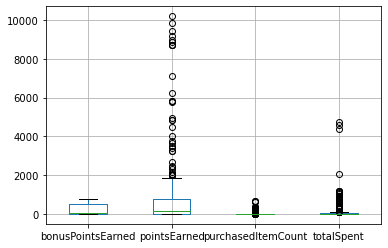

In [60]:
boxplot_r = receipts.boxplot(column = ['bonusPointsEarned', 'pointsEarned','purchasedItemCount','totalSpent'])

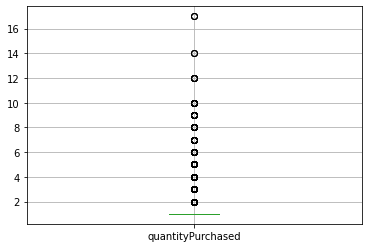

In [61]:
boxplot_i = Itemslist.boxplot(column = ['quantityPurchased'])

In [ ]:
#Duplicated records

In [62]:
receipts.duplicated().value_counts()

False    1119
dtype: int64

In [63]:
users.duplicated().value_counts()

True     283
False    212
dtype: int64

In [64]:
Itemslist.duplicated().value_counts()

False    7381
dtype: int64

In [65]:
brands.duplicated().value_counts()

False    1167
dtype: int64